# SageMaker Model Monitor - Visualizing Monitoring Results


The prebuilt container from SageMaker computes a variety of statistics and evaluates constraints out of the box. This notebook demonstrates how you can visualize them. You can grab the ProcessingJob arn from the executions behind a MonitoringSchedule and use this notebook to visualize the results.

Let's import some python libraries that will be helpful for visualization

In [1]:
from sagemaker.model_monitor import MonitoringExecution
from IPython.display import HTML, display
from sagemaker.s3 import S3Downloader
from sagemaker import session
import utils as mu
import sagemaker
import boto3
import json
import os

## Get Execution and Baseline Details from Processing Job Arn

Enter the ProcessingJob arn for an execution of a MonitoringSchedule below to get the result files associated with that execution

In [3]:
# CHANGE THIS (Copy ARN from SageMaker Console under Processing Jobs)
processing_job_arn = "arn:aws:sagemaker:us-east-1:892313895307:processing-job/model-monitoring-202011082000-96ca3043fa6008fafb2dedd8"

In [6]:
execution = MonitoringExecution.from_processing_arn(sagemaker_session=session.Session(), 
                                                    processing_job_arn=processing_job_arn)

exec_inputs = {inp['InputName']: inp for inp in execution.describe()['ProcessingInputs']}
exec_results = execution.output.destination

In [8]:
baseline_statistics_filepath = exec_inputs['baseline']['S3Input']['S3Uri'] if 'baseline' in exec_inputs else None
execution_statistics_filepath = os.path.join(exec_results, 'statistics.json')
violations_filepath = os.path.join(exec_results, 'constraint_violations.json')

baseline_statistics = json.loads(S3Downloader.read_file(baseline_statistics_filepath)) if baseline_statistics_filepath is not None else None
execution_statistics = json.loads(S3Downloader.read_file(execution_statistics_filepath))
violations = json.loads(S3Downloader.read_file(violations_filepath))['violations']

## Overview

The code below shows the violations and constraint checks across all features in a simple table.

In [9]:
mu.show_violation_df(baseline_statistics=baseline_statistics, latest_statistics=execution_statistics, violations=violations)

,data_type,completeness,baseline_drift,categorical_values
class,Fractional,100.00%,N/A,N/A
color_score,Fractional,100.00%,N/A,N/A
height,Fractional,100.00%,N/A,N/A
mass,Fractional,100.00%,12.80%,N/A
width,Fractional,100.00%,N/A,N/A


## Distributions

This section visualizes the distribution and renders the distribution statistics for all features

In [10]:
features = mu.get_features(execution_statistics)
feature_baselines = mu.get_features(baseline_statistics)

,num_present,num_missing,mean,sum,std_dev,min,max
class,121899,0,0.850114,1.036280e+05,1.107998,0.000000,3.000000
mass,121899,0,-0.100035,-1.219417e+04,9.195325,-34.000000,23.000000
width,121899,0,23.695746,2.888488e+06,77.952985,0.000000,343.000000
height,121899,0,0.328452,4.003799e+04,0.463386,-0.681011,0.993026
color_score,121899,0,2.090061,2.547763e+05,4.034095,-0.117647,12.000000


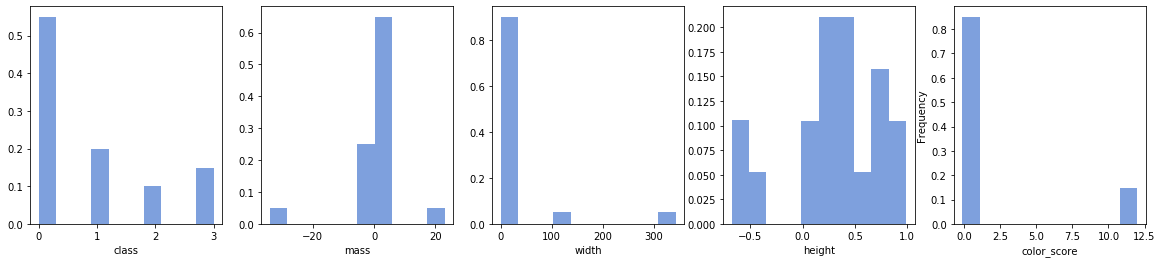

In [11]:
mu.show_distributions(features)

### Execution Stats vs Baseline

,num_present,num_missing,mean,sum,std_dev,min,max
class,121899,0,0.850114,1.036280e+05,1.107998,0.000000,3.000000
mass,121899,0,-0.100035,-1.219417e+04,9.195325,-34.000000,23.000000
width,121899,0,23.695746,2.888488e+06,77.952985,0.000000,343.000000
height,121899,0,0.328452,4.003799e+04,0.463386,-0.681011,0.993026
color_score,121899,0,2.090061,2.547763e+05,4.034095,-0.117647,12.000000


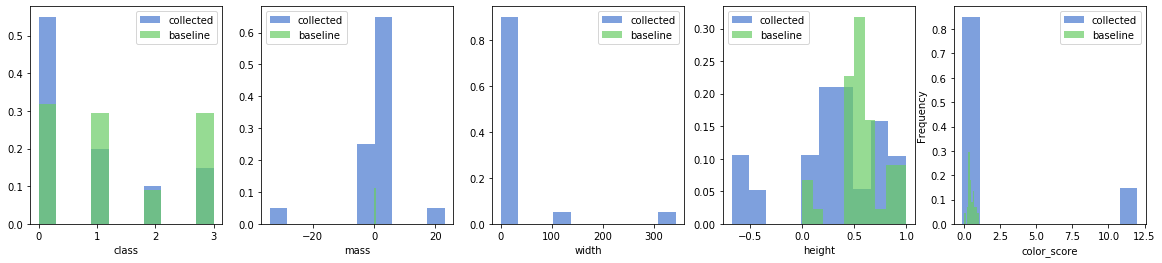

In [12]:
mu.show_distributions(features, feature_baselines)